# EngineEconomics

This library is designed to perform calculations related to Engineering Economics, Finance, Banking, Project Assessment, and Economics related to the Time Value of Money. 


# 1. Loading dependencies

The library consists of 5 classes:


- factor: designed to calculate the factors to which discrete cash flows relate.

- time_value: This class is used to estimate the values of money over time according to the type of cash flow to be found.

- time_value_plot: This class allows to plot in a simple way the cash flows according to the factor used.

- time_value_table: This class is used to generate dataframes in pandas.

- compound_interest: This class allows interest rate conversions between different time periods.

In [2]:
from engineconomics import factor
from engineconomics import time_value
from engineconomics import time_value_plot
from engineconomics import time_value_table
from engineconomics import compound_interest

## 1.2 Instantiating objects

In [3]:
fc = factor()
tv = time_value()
tvp = time_value_plot()
tvt = time_value_table()
ci = compound_interest()

# 2. Single payments

    2.1 Single Amount 
        2.1.1 Present Worth given Future Worth
        2.1.2 Future Worth given Present Worth
    2.2 Uniform Series
        2.2.1 Present Worth given Annuity
        2.2.2 Future worth given Annuity
        2.2.3 Annuity given Present Worth
        2.2.4 Annuity given Future Worth
    2.3 Arithmetic Gradient
        2.3.1 Present Worth given Arithmetic Gradient
        2.3.2 Annuity given Arithmetic Gradient
        2.3.3 Future  Worth given Arithmetic Gradient
    2.4 Geometric Gradient
     2.4.1 Present Value given an initial Annuity and a Geometric Gradient


## 2.1 Single Amount

### 2.1.1 Present Worth given Future Worth

Factor "P/F"

The nomenclature of factors in economic engineering has two elements.  The first represents the equivalent quantity to be found.   The second is the quantity to be transformed, the slash symbol is read as a given.  In this case "P/F" is read as the present value factor given a future value.  


A factor is a function whose variables are, in most cases, an interest rate i and a compounding period n. When you want to calculate a geometric gradient the function will require adding an additional value corresponding to its gradient g.


In its mathematical form this factor can be expressed as:

**Factor formula:**
$$
\begin{align*}
\large
P/F = \frac{1}{(1+i)^{n}}
\end{align*}
$$

**Notation:**
$$
\large
(P/F, i, n)
$$

- To find the present value factor given an interest rate i and a time period n

In [4]:
# factor math computation
i = 0.005
n = 12

pg = 1 /(1+i)**n
pg

0.941905339665919

In [5]:
# factor function
i = 0.005
n = 12

fpg = fc.pgivenfsp(i,n)
fpg

0.941905339665919

In [6]:
# Sanity check

assert fpg==pg

Then, to find the present value, all that is required is to multiply the future value "F" by the factor "P/F".  


$$
\begin{align*}
\large
P = F  \frac{1}{(1+i)^{n}}
\end{align*}
$$


The engineering economics notation of the above formula is:

$$
\large
P = F(P/F, i, n)
$$

This representation is known as Standard Notation Equation.

In [7]:
Fm = 100
Pm = Fm * pg
Pm

94.1905339665919

In [9]:
Ff = 100
Pf = Ff * fpg
Pf

94.1905339665919

The library has an option to obtain the same current value, but this time the cfv function is used, which allows to calculate any of the factors explicitly by changing the elements of the same function.

The `time_value` class always requires four arguments (with the exception of geometric gradient which will be explained below):

- Cash flow (P, F or A) as input variable.
- Factor which defines what is the type of equivalent value to be found:
 
    * "P/F": Find P Present Worth given F Future worth, interest i and number of periods n.
    * "F/P": Find F Future worth given P Present Worth, interest i and number of periods n., 
    * "P/A": Find P Present Worth given A Equal payment series, interest i and number of periods n.
    * "A/P": Find A Equal payment series given P Present Worth, interest i and number of periods n.  
    * "F/A": Find F Future worth given A Equal payment series, interest i and number of periods n. 
    * "A/F": Find A Equal payment series given F Future worth, interest i and number of periods n.   
    * "P/G": Find P Present Worth given G Arithmetic Gradient, interest i and number of periods n.
    * "P/g": Find P Present Worth given g Geometric Gradient, A1 First payment, interest i and number of periods n.    

  
- An effective interest rate i.
- A compounding period n.

In [10]:
# Compute P/F with a time value function

Factor = "P/F"
F = 100
i = 0.005
n = 12

PF = tv.cfv(F, Factor, i, n)
PF

{'FV': 100, 'Factor': 'P/F', 'i': 0.005, 'n': 12, 'PV': 94.1905339665919}

This function returns a dictionary with the transformed value, together with the parameters used to calculate the equivalent value.

In [14]:
# Sanity check
assert PF['PV'] == Pm

The library allows two types of charts, a bar chart and an arrow chart, which is the usual chart used in engineering economics texts.  The charts present the calculated value with its corresponding factor and the graphical representation of the cash flows.  As a convention, the value in period zero is assumed to be an investment, hence an outflow and hence the negative value, while the value in the subsequent period(s) is taken as positive.  

    Period  Income  Outcome
0        0     0.0 -94.1905
1        1     0.0   0.0000
2        2     0.0   0.0000
3        3     0.0   0.0000
4        4     0.0   0.0000
5        5     0.0   0.0000
6        6     0.0   0.0000
7        7     0.0   0.0000
8        8     0.0   0.0000
9        9     0.0   0.0000
10      10     0.0   0.0000
11      11     0.0   0.0000
12      12   100.0   0.0000


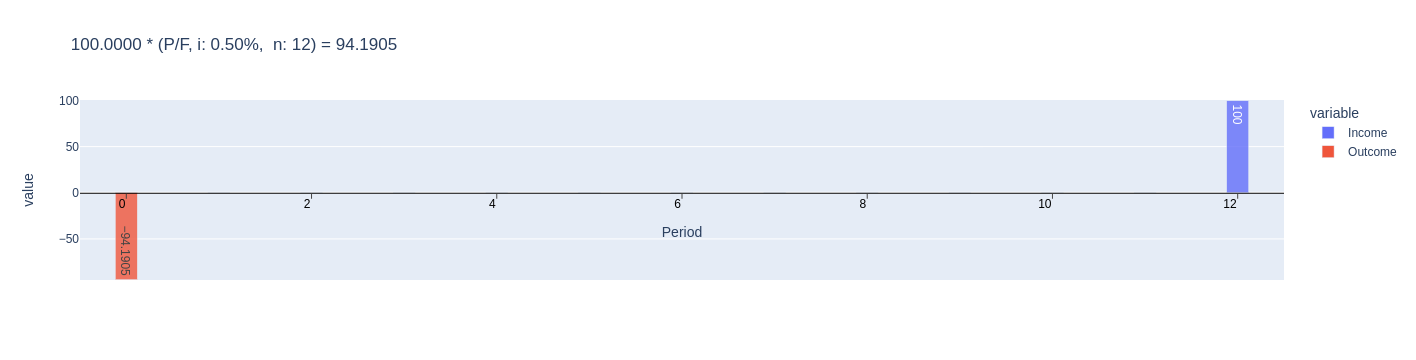

In [15]:
tvp.cf_plot_bar(PF)

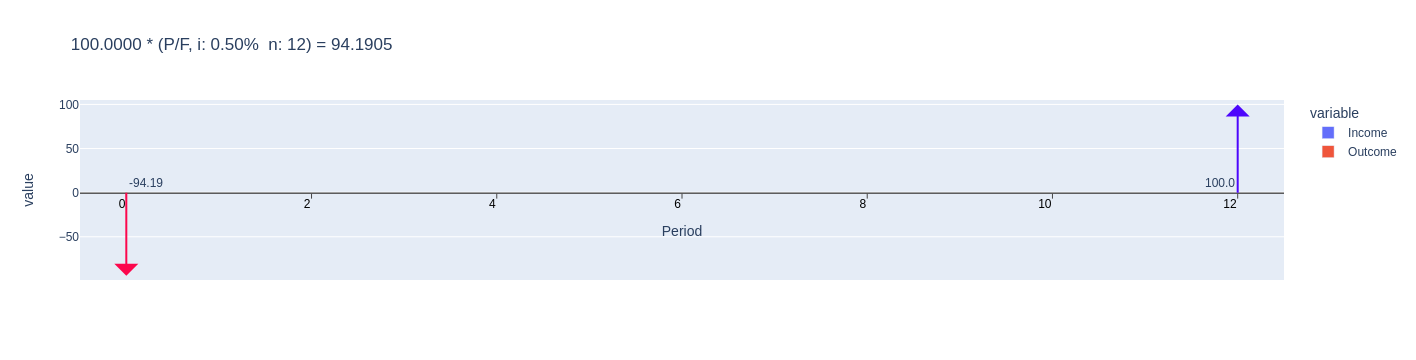

In [16]:
tvp.cf_plot_arrow(PF)

It is also possible to make a pandas data frame with all cash flows.  It allows exporting to csv file if necessary.

In [17]:
tvt.cfdataframe(PF)

Period  Income  Outcome
0        0     0.0 -94.1905
1        1     0.0   0.0000
2        2     0.0   0.0000
3        3     0.0   0.0000
4        4     0.0   0.0000
5        5     0.0   0.0000
6        6     0.0   0.0000
7        7     0.0   0.0000
8        8     0.0   0.0000
9        9     0.0   0.0000
10      10     0.0   0.0000
11      11     0.0   0.0000
12      12   100.0   0.0000

### 2.1.2 Future Worth given Present Worth 

Factor "F/P"

**Factor formula:**
$$
\begin{align*}
\large
F/P = (1+i)^{n}
\end{align*}
$$

**Notation:**
$$
\large
(F/P, i, n)
$$

In [18]:
# factor math computation
i = 0.005
n = 12

fg = (1+i)**n
fg

1.0616778118644983

In [19]:
# factor function
i = 0.005
n = 12

ffg = fc.fgivenpsp(i,n)
ffg

1.0616778118644983

In [20]:
# Sanity check
assert fg == ffg

**Future Worth**

**Equation with Factor Formula:**
$$
\begin{align*}
\large
F = P (1+i)^{n}
\end{align*}
$$

**Standard Notation Equation:**
$$
\large
F = P(F/P, i, n)
$$

In [21]:
Pm = 100
Fm = Pm * fg
Fm

106.16778118644983

In [22]:
Pf = 100
Ff = Pf * ffg
Ff

106.16778118644983

In [24]:
# Compute F/P with a time value function

Factor = "F/P"
P = 100 # Present value
i = 0.005
n = 12

FP = tv.cfv(P, Factor, i, n)
FP

{'PV': 100, 'Factor': 'F/P', 'i': 0.005, 'n': 12, 'FV': 106.16778118644983}

In [25]:
# Sanity check

assert Fm == FP['FV'] 

    Period    Income  Outcome
0        0    0.0000     -100
1        1    0.0000        0
2        2    0.0000        0
3        3    0.0000        0
4        4    0.0000        0
5        5    0.0000        0
6        6    0.0000        0
7        7    0.0000        0
8        8    0.0000        0
9        9    0.0000        0
10      10    0.0000        0
11      11    0.0000        0
12      12  106.1678        0


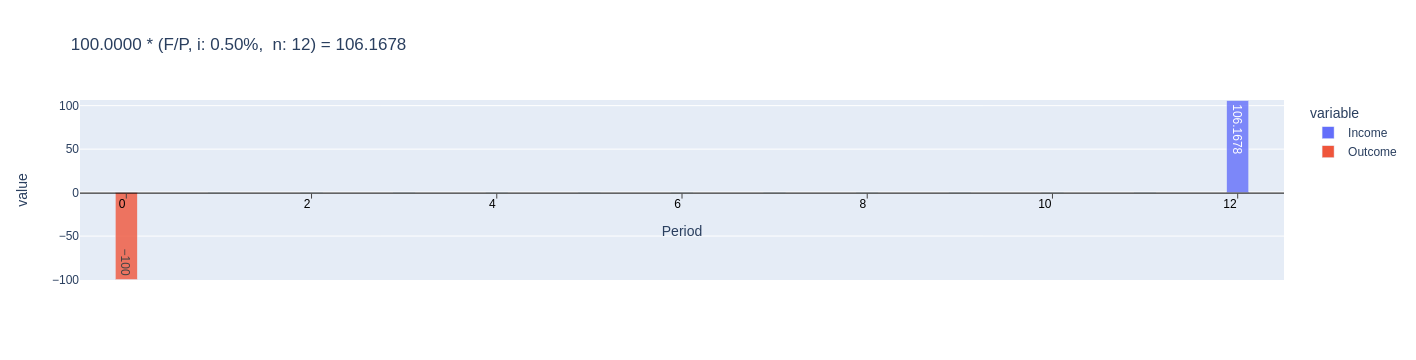

In [26]:
tvp.cf_plot_bar(FP)

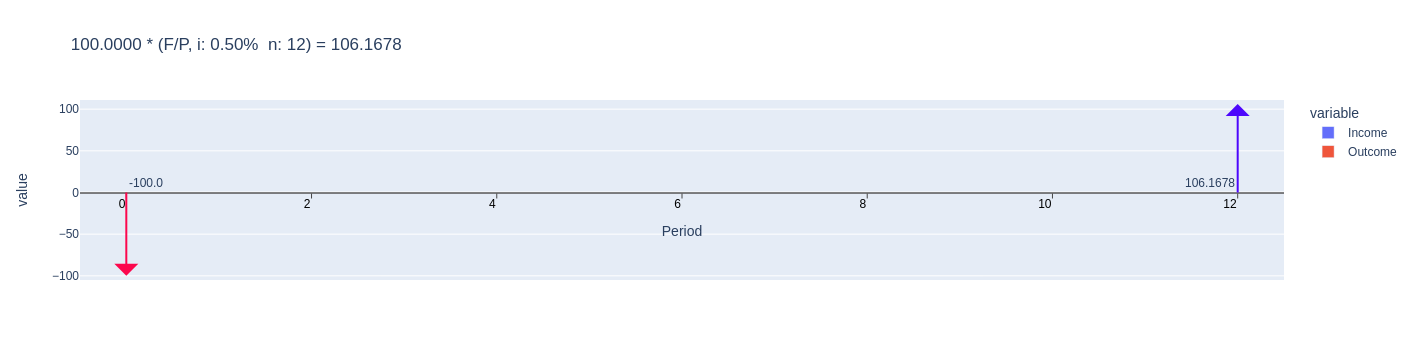

In [27]:
tvp.cf_plot_arrow(FP)

In [28]:
tvt.cfdataframe(FP)

Period    Income  Outcome
0        0    0.0000   -100.0
1        1    0.0000      0.0
2        2    0.0000      0.0
3        3    0.0000      0.0
4        4    0.0000      0.0
5        5    0.0000      0.0
6        6    0.0000      0.0
7        7    0.0000      0.0
8        8    0.0000      0.0
9        9    0.0000      0.0
10      10    0.0000      0.0
11      11    0.0000      0.0
12      12  106.1678      0.0

## 2.2 Uniform Series

### 2.2.1 Present Worth given Annuity

Factor "P/A"

**Factor formula:**
$$
\begin{align*}
\large
P/A = \frac {(1+i)^{n} - 1}{i(1+i)^{n}}
\end{align*}
$$

**Notation:**
$$
\large
(P/A, i, n)
$$

In [29]:
# factor math computation
i = 0.005
n = 12

pg = ((1+i)**n - 1) / (i*(1+i)**n)
pg

11.61893206681618

In [30]:
# factor function
i = 0.005
n = 12

fpg = fc.pgivena(i,n)
fpg

11.61893206681618

In [31]:
# Sanity check

assert pg == fpg

**Equation with Factor Formula:**
$$
\begin{align*}
\large
P = A \frac {(1+i)^{n} - 1}{i(1+i)^{n}}
\end{align*}
$$

**Standard Notation Equation:**
$$
\large
P = A(P/A, i, n)
$$

In [32]:
Am = 8.606642970708236
Pm = Am * pg
Pm

100.0

In [33]:
Af = 8.606642970708236
Pf = Af * fpg
Pf

100.0

In [34]:
Factor = "P/A"
A = 8.606642970708236
i = 0.005
n = 12

PA = tv.cfv(A, Factor, i, n)
PA

{'A': 8.606642970708236, 'Factor': 'P/A', 'i': 0.005, 'n': 12, 'PV': 100.0}

In [35]:
# Sanity check
assert  Pm == PA['PV']

    Period  Income  Outcome
0        0  0.0000   -100.0
1        1  8.6066      0.0
2        2  8.6066      0.0
3        3  8.6066      0.0
4        4  8.6066      0.0
5        5  8.6066      0.0
6        6  8.6066      0.0
7        7  8.6066      0.0
8        8  8.6066      0.0
9        9  8.6066      0.0
10      10  8.6066      0.0
11      11  8.6066      0.0
12      12  8.6066      0.0


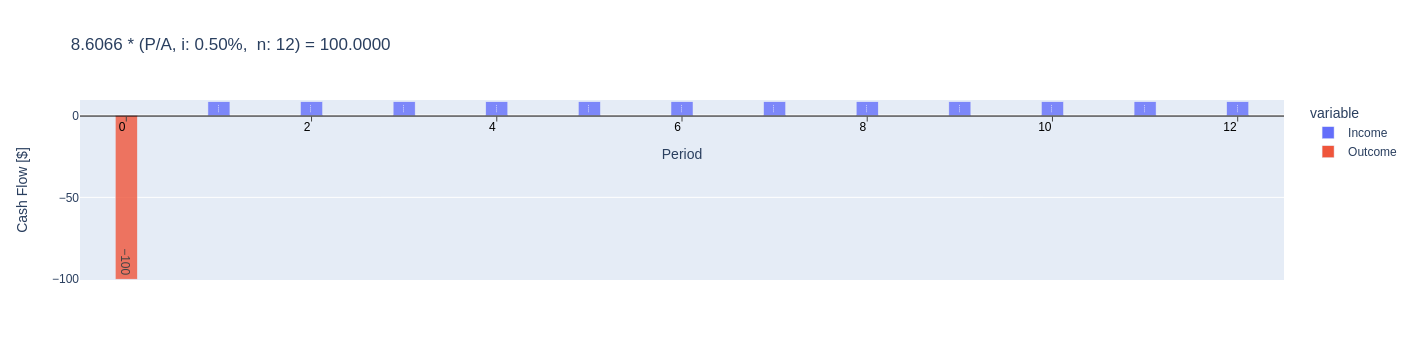

In [36]:
tvp.cf_plot_bar(PA)

    Period  Income  Outcome
0        0  0.0000   -100.0
1        1  8.6066      0.0
2        2  8.6066      0.0
3        3  8.6066      0.0
4        4  8.6066      0.0
5        5  8.6066      0.0
6        6  8.6066      0.0
7        7  8.6066      0.0
8        8  8.6066      0.0
9        9  8.6066      0.0
10      10  8.6066      0.0
11      11  8.6066      0.0
12      12  8.6066      0.0


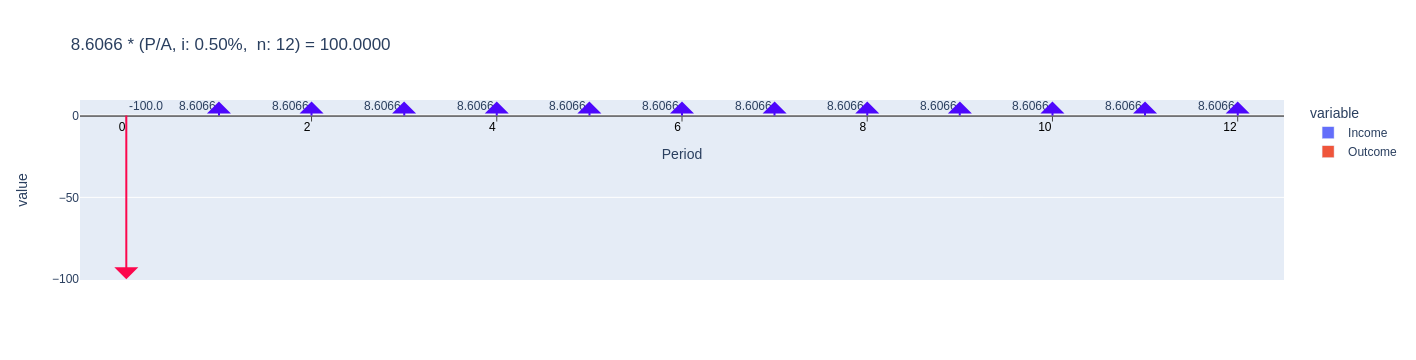

In [37]:
tvp.cf_plot_arrow(PA)

In [38]:
tvt.cfdataframe(PA)

Period  Income  Outcome
0        0  0.0000   -100.0
1        1  8.6066      0.0
2        2  8.6066      0.0
3        3  8.6066      0.0
4        4  8.6066      0.0
5        5  8.6066      0.0
6        6  8.6066      0.0
7        7  8.6066      0.0
8        8  8.6066      0.0
9        9  8.6066      0.0
10      10  8.6066      0.0
11      11  8.6066      0.0
12      12  8.6066      0.0

### 2.2.2 Future worth given Annuity

Factor "F/A"

**Factor formula:**
$$
\begin{align*}
\large
F/A = \frac {(1+i)^{n}-1}  {i}
\end{align*}
$$

**Notation:**
$$
\large
(F/A, i, n)
$$

In [50]:
# factor math computation
i = 0.005
n = 12

ag = ((1+i)**n - 1) / i
ag

12.335562372899656

In [51]:
# factor function
i = 0.005
n = 12

fag = fc.fgivena(i,n)
fag

12.335562372899656

In [52]:
# Sanity check

assert ag == fag

**Equation with Factor Formula:**
$$
\begin{align*}
\large
F = A \frac {(1+i)^{n}-1}  {i}
\end{align*}
$$

**Standard Notation Equation:**
$$
\large
F = A (F/A, i, n)
$$

In [53]:
Am = 8.106642970708236
Fm = Am * ag
Fm

100.0

In [54]:
Af = 8.106642970708236
Ff = Af * fag
Ff

100.0

In [55]:
Factor = "F/A"
A = 8.106642970708236
i = 0.005
n = 12

FA = tv.cfv(A, Factor, i, n)
FA

{'A': 8.106642970708236, 'Factor': 'F/A', 'i': 0.005, 'n': 12, 'FV': 100.0}

In [56]:
# Sanity check
assert  Fm == FA['FV']

    Period  Income  Outcome
0        0     0.0   0.0000
1        1     0.0  -8.1066
2        2     0.0  -8.1066
3        3     0.0  -8.1066
4        4     0.0  -8.1066
5        5     0.0  -8.1066
6        6     0.0  -8.1066
7        7     0.0  -8.1066
8        8     0.0  -8.1066
9        9     0.0  -8.1066
10      10     0.0  -8.1066
11      11     0.0  -8.1066
12      12   100.0  -8.1066


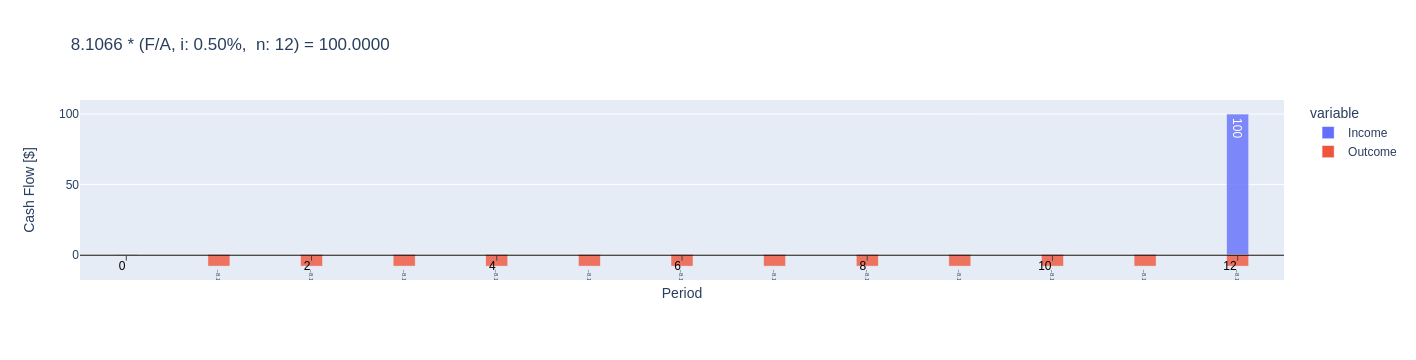

In [57]:
tvp.cf_plot_bar(FA)

    Period  Income  Outcome
0        0     0.0   0.0000
1        1     0.0  -8.1066
2        2     0.0  -8.1066
3        3     0.0  -8.1066
4        4     0.0  -8.1066
5        5     0.0  -8.1066
6        6     0.0  -8.1066
7        7     0.0  -8.1066
8        8     0.0  -8.1066
9        9     0.0  -8.1066
10      10     0.0  -8.1066
11      11     0.0  -8.1066
12      12   100.0  -8.1066


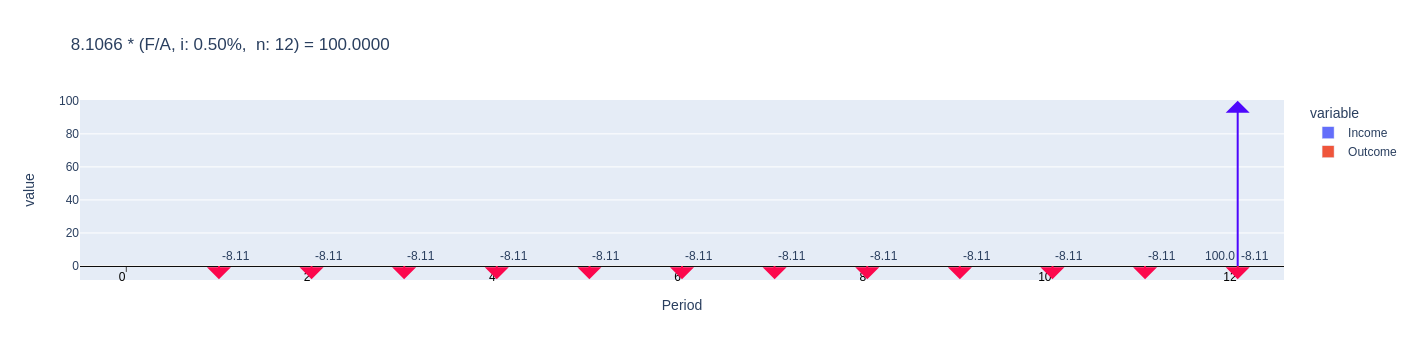

In [58]:
tvp.cf_plot_arrow(FA)

In [59]:
tvt.cfdataframe(FA)

Period  Income  Outcome
0        0     0.0   0.0000
1        1     0.0  -8.1066
2        2     0.0  -8.1066
3        3     0.0  -8.1066
4        4     0.0  -8.1066
5        5     0.0  -8.1066
6        6     0.0  -8.1066
7        7     0.0  -8.1066
8        8     0.0  -8.1066
9        9     0.0  -8.1066
10      10     0.0  -8.1066
11      11     0.0  -8.1066
12      12   100.0  -8.1066

### 2.2.3 Annuity given Present Worth

Factor "A/P"


**Factor formula:**
$$
\begin{align*}
\large
A/P = \frac {i(1+i)^{n}}  {(1+i)^{n} - 1}
\end{align*}
$$

**Notation:**
$$
\large
(A/P, i, n)
$$

In [39]:
# factor math computation
i = 0.005
n = 12

ag = (i*(1+i)**n)/((1+i)**n - 1)
ag

0.08606642970708236

In [40]:
# factor function
i = 0.005
n = 12

fag = fc.agivenp(i,n)
fag

0.08606642970708236

In [41]:
# Sanity check

assert ag == fag

**Equation with Factor Formula:**
$$
\begin{align*}
\large
A = P \frac {i(1+i)^{n}} {(1+i)^{n} - 1}
\end{align*}
$$

**Standard Notation Equation:**
$$
\large
A = P(A/P, i, n)
$$


In [42]:
Pm = 100
Am = Pm * ag
Am

8.606642970708236

In [43]:
Pf = 100
Af = Pf * fag
Af

8.606642970708236

In [44]:
Factor = "A/P"
A = 100
i = 0.005
n = 12

AP = tv.cfv(A, Factor, i, n)
AP

{'PV': 100, 'Factor': 'A/P', 'i': 0.005, 'n': 12, 'A': 8.606642970708236}

In [45]:
# Sanity check
assert Am == AP['A']

    Period  Income  Outcome
0        0  0.0000   -100.0
1        1  8.6066      0.0
2        2  8.6066      0.0
3        3  8.6066      0.0
4        4  8.6066      0.0
5        5  8.6066      0.0
6        6  8.6066      0.0
7        7  8.6066      0.0
8        8  8.6066      0.0
9        9  8.6066      0.0
10      10  8.6066      0.0
11      11  8.6066      0.0
12      12  8.6066      0.0


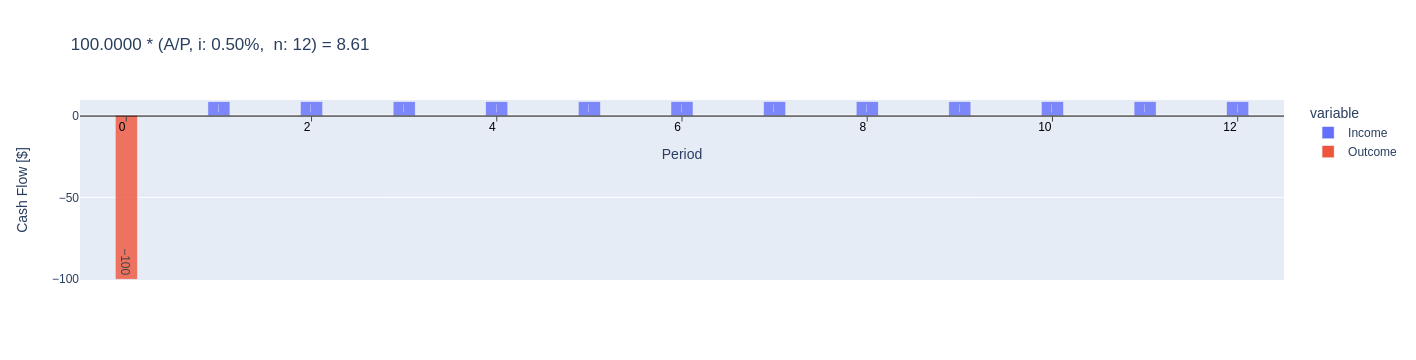

In [46]:
tvp.cf_plot_bar(AP)

    Period  Income  Outcome
0        0  0.0000   -100.0
1        1  8.6066      0.0
2        2  8.6066      0.0
3        3  8.6066      0.0
4        4  8.6066      0.0
5        5  8.6066      0.0
6        6  8.6066      0.0
7        7  8.6066      0.0
8        8  8.6066      0.0
9        9  8.6066      0.0
10      10  8.6066      0.0
11      11  8.6066      0.0
12      12  8.6066      0.0


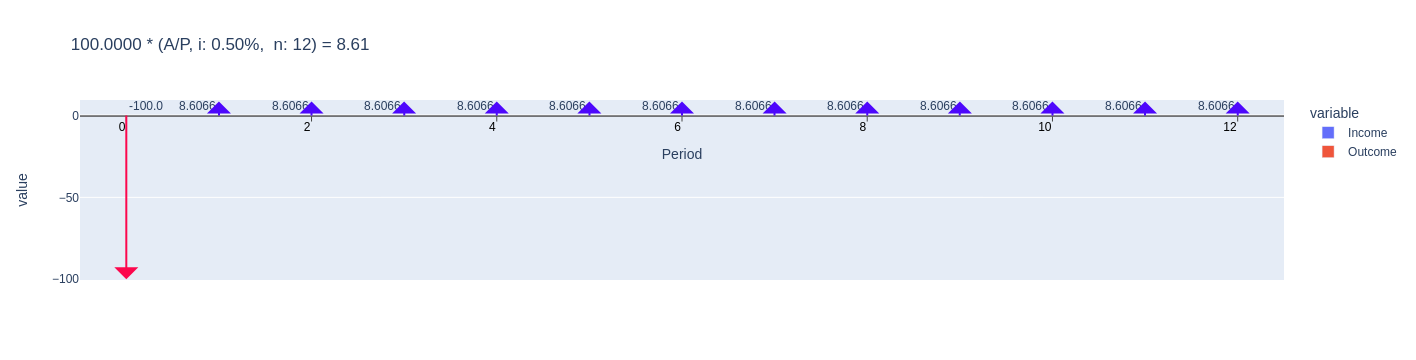

In [47]:
tvp.cf_plot_arrow(AP)

    Period  Income  Outcome
0        0  0.0000   -100.0
1        1  8.6066      0.0
2        2  8.6066      0.0
3        3  8.6066      0.0
4        4  8.6066      0.0
5        5  8.6066      0.0
6        6  8.6066      0.0
7        7  8.6066      0.0
8        8  8.6066      0.0
9        9  8.6066      0.0
10      10  8.6066      0.0
11      11  8.6066      0.0
12      12  8.6066      0.0


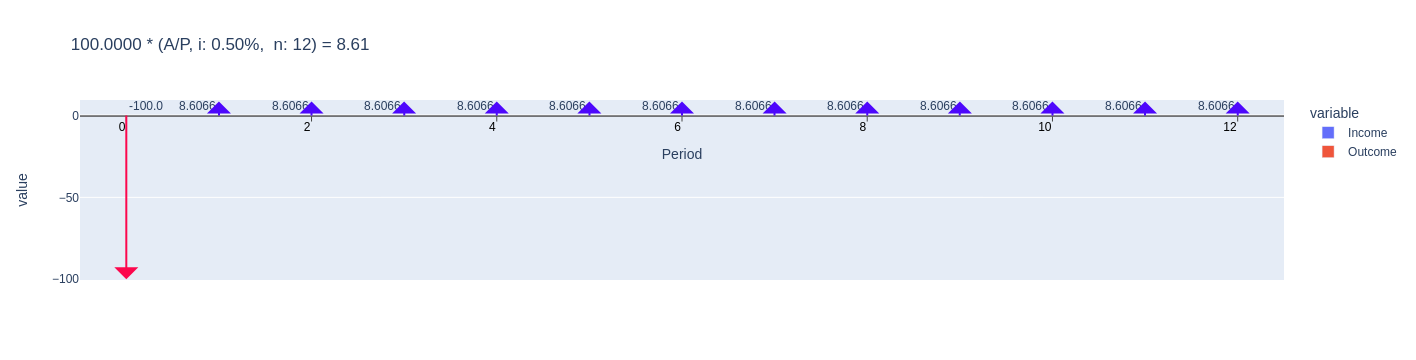

In [48]:
tvp.cf_plot_arrow(AP)

In [49]:
tvt.cfdataframe(AP)

Period  Income  Outcome
0        0  0.0000   -100.0
1        1  8.6066      0.0
2        2  8.6066      0.0
3        3  8.6066      0.0
4        4  8.6066      0.0
5        5  8.6066      0.0
6        6  8.6066      0.0
7        7  8.6066      0.0
8        8  8.6066      0.0
9        9  8.6066      0.0
10      10  8.6066      0.0
11      11  8.6066      0.0
12      12  8.6066      0.0

### 2.2.4 Annuity given Future Worth

Factor "A/F"

**Factor formula:**
$$
\begin{align*}
\large
F/A = \frac {i}{(1+i)^{n}-1}
\end{align*}
$$

**Notation:**
$$
\large
(A/F, i, n)
$$

In [60]:
# factor math computation
i = 0.005
n = 12

ag = i / ((1+i)**n - 1) 
ag

0.08106642970708236

In [61]:
# factor function
i = 0.005
n = 12

fag = fc.agivenf(i,n)
fag

0.08106642970708236

In [64]:
# Sanity check

assert ag == fag

**Equation with Factor Formula:**
$$
\begin{align*}
\large
A =  F \frac {i}{(1+i)^{n}-1}
\end{align*}
$$

**Standard Notation Equation:**
$$
\large
A = F (A/F, i, n)
$$

In [65]:
Fm = 100
Am = Fm * ag
Am

8.106642970708236

In [68]:
Ff = 100
Af = Ff * fag
Af

8.106642970708236

In [70]:
Factor = "A/F"
F = 100
i = 0.005
n = 12

AF = tv.cfv(F, Factor, i, n)
AF

{'FV': 100, 'Factor': 'A/F', 'i': 0.005, 'n': 12, 'A': 8.106642970708236}

In [71]:
# Sanity check

assert Am == AF['A']

    Period  Income  Outcome
0        0     0.0   0.0000
1        1     0.0  -8.1066
2        2     0.0  -8.1066
3        3     0.0  -8.1066
4        4     0.0  -8.1066
5        5     0.0  -8.1066
6        6     0.0  -8.1066
7        7     0.0  -8.1066
8        8     0.0  -8.1066
9        9     0.0  -8.1066
10      10     0.0  -8.1066
11      11     0.0  -8.1066
12      12   100.0  -8.1066


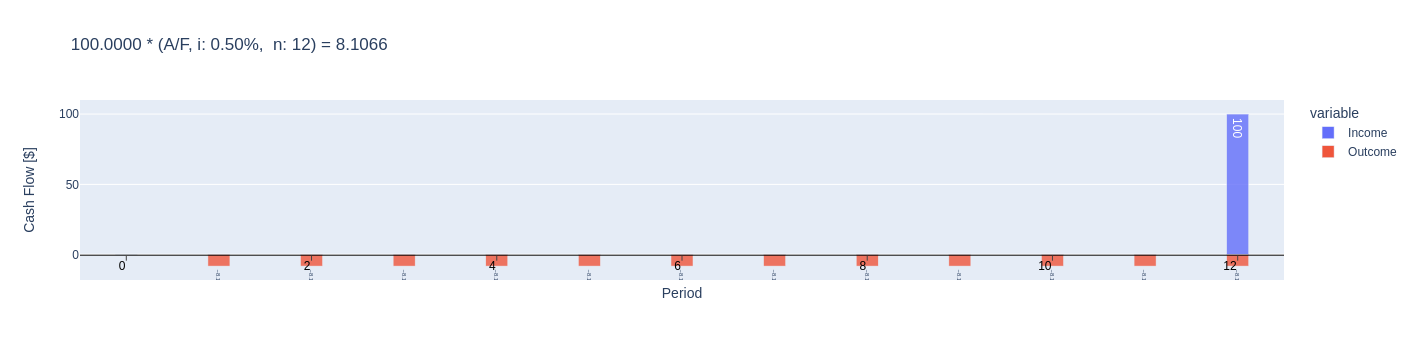

In [72]:
tvp.cf_plot_bar(AF)

    Period  Income  Outcome
0        0     0.0   0.0000
1        1     0.0  -8.1066
2        2     0.0  -8.1066
3        3     0.0  -8.1066
4        4     0.0  -8.1066
5        5     0.0  -8.1066
6        6     0.0  -8.1066
7        7     0.0  -8.1066
8        8     0.0  -8.1066
9        9     0.0  -8.1066
10      10     0.0  -8.1066
11      11     0.0  -8.1066
12      12   100.0  -8.1066


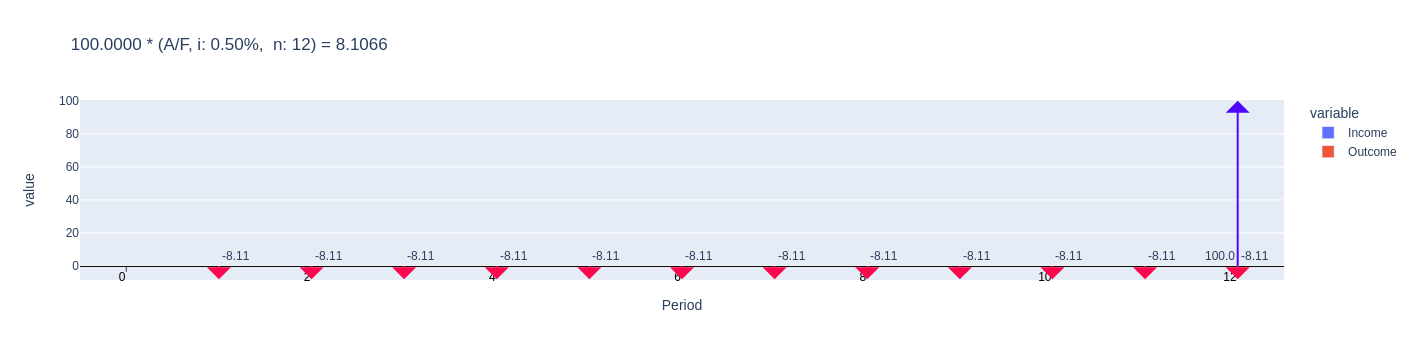

In [73]:
tvp.cf_plot_arrow(AF)

In [74]:
tvt.cfdataframe(AF)

Period  Income  Outcome
0        0     0.0   0.0000
1        1     0.0  -8.1066
2        2     0.0  -8.1066
3        3     0.0  -8.1066
4        4     0.0  -8.1066
5        5     0.0  -8.1066
6        6     0.0  -8.1066
7        7     0.0  -8.1066
8        8     0.0  -8.1066
9        9     0.0  -8.1066
10      10     0.0  -8.1066
11      11     0.0  -8.1066
12      12   100.0  -8.1066

## 2.3 Arithmetic Gradient

### 2.3.1 Present Worth given Arithmetic Gradient


Factor "P/G"


**Factor formula:**
$$
\begin{align*}
\large
P/G = \frac{(1+i)^{n} - in - 1}{i^2 (1+i)^{n}}
\end{align*}
$$

**Notation:**
$$
\large
P/G = (P/G, i, n)
$$

In [75]:
# factor math computation
i = 0.005
n = 12

pg = (((1+i)**n) - (i*n) - 1) / ((i**2) * ((1+i)**n))
pg

63.21359816502835

In [76]:
# factor function
i = 0.005
n = 12

fpg = fc.pgivenag(i,n)
fpg

63.21359816502835

In [77]:
# Sanity check

assert  pg == fpg

**Equation with Factor Formula:**
$$
\begin{align*}
\large
P = {G}  \left[ \frac{(1+i)^{n} - in - 1}{i^2 (1+i)^{n}} \right]
\end{align*}
$$

**Standard Notation Equation:**
$$
\large
P = G (P/G, i, n)
$$

In [78]:
Gm = 1.5819381098816012
Pm = Gm * pg
Pm

100.0

In [79]:
Gf = 1.5819381098816012
Pf = Gf * fpg
Pf

100.0

In [80]:
Factor = "P/G"
G = 1.5819381098816012
i = 0.005
n = 12

PG = tv.cfv(G, Factor, i, n)
PG

{'G': 1.5819381098816012, 'Factor': 'P/G', 'i': 0.005, 'n': 12, 'PV': 100.0}

In [82]:
# Sanity check

assert Pm == PG['PV']

    Period  Gradient Income  Outcome
0        0           0.0000   -100.0
1        1           0.0000      0.0
2        2           1.5819      0.0
3        3           3.1638      0.0
4        4           4.7457      0.0
5        5           6.3276      0.0
6        6           7.9095      0.0
7        7           9.4914      0.0
8        8          11.0733      0.0
9        9          12.6552      0.0
10      10          14.2371      0.0
11      11          15.8190      0.0
12      12          17.4009      0.0


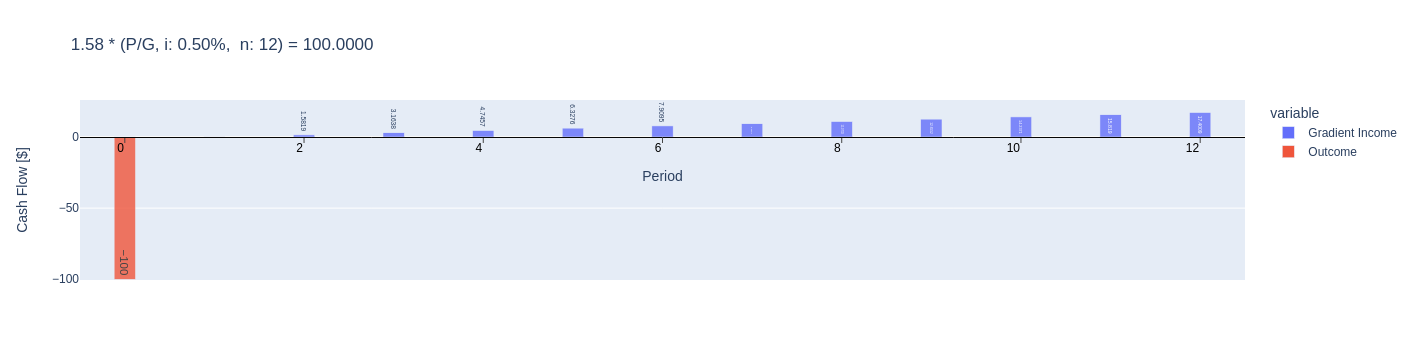

In [83]:
tvp.cf_plot_bar(PG)

    Period  Gradient Income  Outcome
0        0           0.0000   -100.0
1        1           0.0000      0.0
2        2           1.5819      0.0
3        3           3.1638      0.0
4        4           4.7457      0.0
5        5           6.3276      0.0
6        6           7.9095      0.0
7        7           9.4914      0.0
8        8          11.0733      0.0
9        9          12.6552      0.0
10      10          14.2371      0.0
11      11          15.8190      0.0
12      12          17.4009      0.0


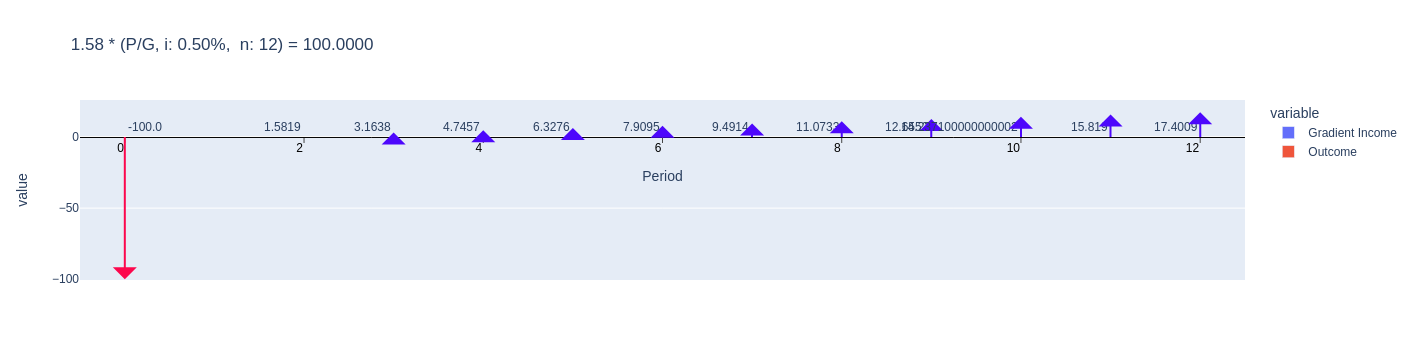

In [84]:
tvp.cf_plot_arrow(PG)

In [85]:
tvt.cfdataframe(PG)

Period  Gradient Income  Outcome
0        0           0.0000   -100.0
1        1           0.0000      0.0
2        2           1.5819      0.0
3        3           3.1638      0.0
4        4           4.7457      0.0
5        5           6.3276      0.0
6        6           7.9095      0.0
7        7           9.4914      0.0
8        8          11.0733      0.0
9        9          12.6552      0.0
10      10          14.2371      0.0
11      11          15.8190      0.0
12      12          17.4009      0.0

### 2.3.2 Annuity given Arithmetic Gradient

Factor "A/G"


**Factor formula:**
$$
\begin{align*}
\large
A/G = \frac {1}{i} - \frac {n}{(1+i)^{n}-1}
\end{align*}
$$

**Notation:**
$$
\large
A/G = (A/G, i, n)
$$

In [90]:
i = 0.005
n = 12

ag = (1/i) - (n / (((1+i)**n) - 1))
ag

5.440568703002327

In [91]:
# factor function
i = 0.005
n = 12

fag = fc.agivenag(i,n)
fag

5.440568703002327

In [92]:
# Sanity check

assert ag == fag

**Equation with Factor Formula:**
$$
\begin{align*}
\large
A = {G}  \left[ \frac {1}{i} - \frac {n}{(1+i)^{n}-1} \right]
\end{align*}
$$

**Standard Notation Equation:**
$$
\large
A = G (A/G, i, n)
$$

In [93]:
Gm = 18.38043143262136
Am = Gm * ag
Am

100.0

In [94]:
Gf = 18.38043143262136
Af = Gf * fag
Af

100.0

In [95]:
Factor = "A/G"
G = 18.38043143262136
i = 0.005
n = 12

AG = tv.cfv(G, Factor, i, n)
AG

{'G': 18.38043143262136, 'Factor': 'A/G', 'i': 0.005, 'n': 12, 'A': 100.0}

In [96]:
assert Am == AG['A']

    Period  Gradient Income  Outcome
0        0           0.0000      0.0
1        1           0.0000   -100.0
2        2          18.3804   -100.0
3        3          36.7608   -100.0
4        4          55.1412   -100.0
5        5          73.5216   -100.0
6        6          91.9020   -100.0
7        7         110.2824   -100.0
8        8         128.6628   -100.0
9        9         147.0432   -100.0
10      10         165.4236   -100.0
11      11         183.8040   -100.0
12      12         202.1844   -100.0


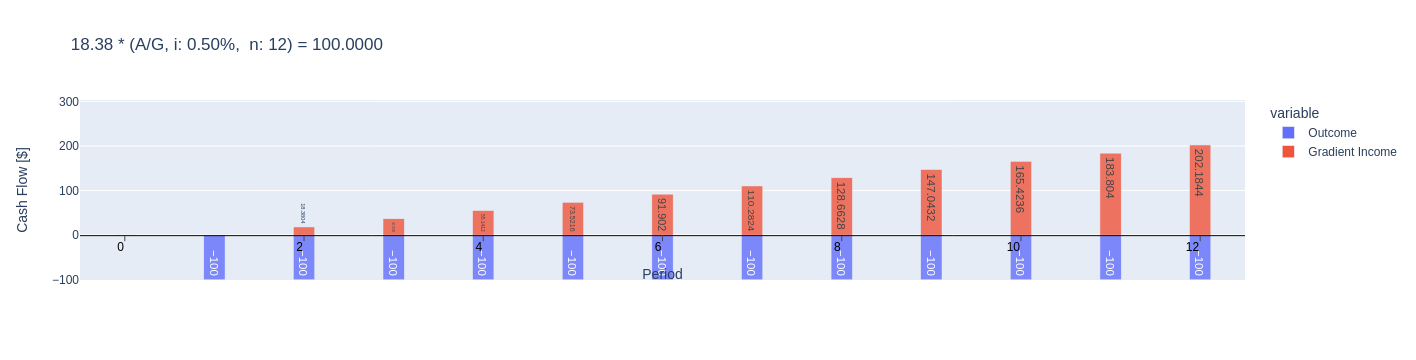

In [97]:
tvp.cf_plot_bar(AG)

    Period  Gradient Income  Outcome
0        0           0.0000      0.0
1        1           0.0000   -100.0
2        2          18.3804   -100.0
3        3          36.7608   -100.0
4        4          55.1412   -100.0
5        5          73.5216   -100.0
6        6          91.9020   -100.0
7        7         110.2824   -100.0
8        8         128.6628   -100.0
9        9         147.0432   -100.0
10      10         165.4236   -100.0
11      11         183.8040   -100.0
12      12         202.1844   -100.0


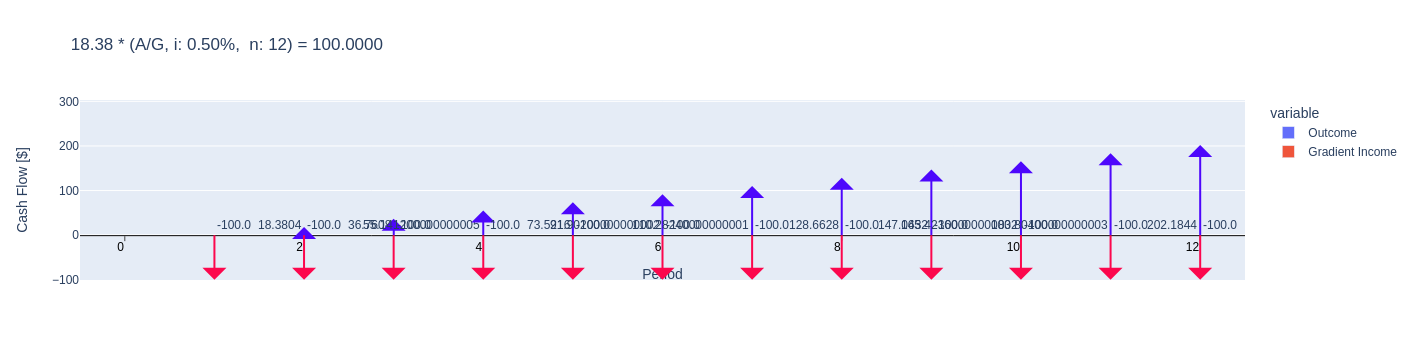

In [98]:
tvp.cf_plot_arrow(AG)

In [99]:
tvt.cfdataframe(AG)

Period  Gradient Income  Outcome
0        0           0.0000      0.0
1        1           0.0000   -100.0
2        2          18.3804   -100.0
3        3          36.7608   -100.0
4        4          55.1412   -100.0
5        5          73.5216   -100.0
6        6          91.9020   -100.0
7        7         110.2824   -100.0
8        8         128.6628   -100.0
9        9         147.0432   -100.0
10      10         165.4236   -100.0
11      11         183.8040   -100.0
12      12         202.1844   -100.0

### 2.3.3 Future  Worth given Arithmetic Gradient

Factor "F/G"


**Factor formula:**
$$
\begin{align*}
\large
F/G = \frac {1}{i} \left[ \frac {(1+i)^{n}-1}{i} - {n} \right]
\end{align*}
$$



**Notation:**
$$
\large
F/G = (F/G, i, n)
$$

In [100]:
i = 0.005
n = 12

fg = (1/i) * (((((1+i)**n) - 1)/i)-n)
fg

67.1124745799311

In [101]:
# factor function
i = 0.005
n = 12

ffg = fc.fgivenag(i,n)
ffg

67.1124745799311

In [102]:
# Sanity check

assert fg == ffg

**Equation with Factor Formula:**

$$
\begin{align*}
\large
F = G  \frac {1}{i} \left[ \frac {(1+i)^{n}-1}{i} - {n} \right]
\end{align*}
$$

**Standard Notation Equation:**
$$
\large
F = G (F/G, i, n)
$$

In [103]:
Gm = 1.4900359527184441
Fm = Gm * fg
Fm

100.0

In [104]:
Gf = 1.4900359527184441
Ff = Gf * ffg
Ff

100.0

In [105]:
Factor = "F/G"
G = 1.4900359527184441
i = 0.005
n = 12

FG = tv.cfv(G, Factor, i, n)
FG

{'G': 1.4900359527184441, 'Factor': 'F/G', 'i': 0.005, 'n': 12, 'FV': 100.0}

In [107]:
# Sanity check

assert Fm == Ff

    Period  Gradient Outcome  Income
0        0              0.00     0.0
1        1             -0.00     0.0
2        2             -1.49     0.0
3        3             -2.98     0.0
4        4             -4.47     0.0
5        5             -5.96     0.0
6        6             -7.45     0.0
7        7             -8.94     0.0
8        8            -10.43     0.0
9        9            -11.92     0.0
10      10            -13.41     0.0
11      11            -14.90     0.0
12      12            -16.39   100.0


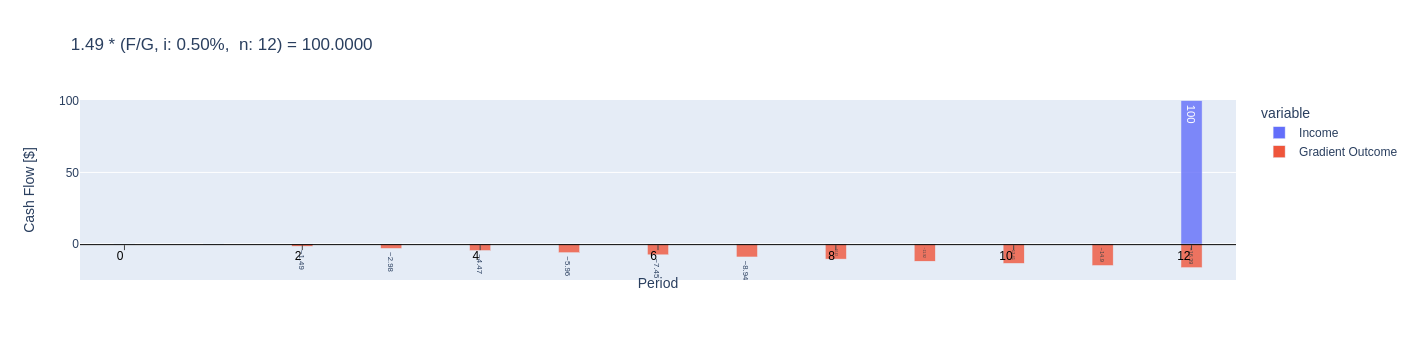

In [106]:
tvp.cf_plot_bar(FG)

    Period  Gradient Outcome  Income
0        0              0.00     0.0
1        1             -0.00     0.0
2        2             -1.49     0.0
3        3             -2.98     0.0
4        4             -4.47     0.0
5        5             -5.96     0.0
6        6             -7.45     0.0
7        7             -8.94     0.0
8        8            -10.43     0.0
9        9            -11.92     0.0
10      10            -13.41     0.0
11      11            -14.90     0.0
12      12            -16.39   100.0


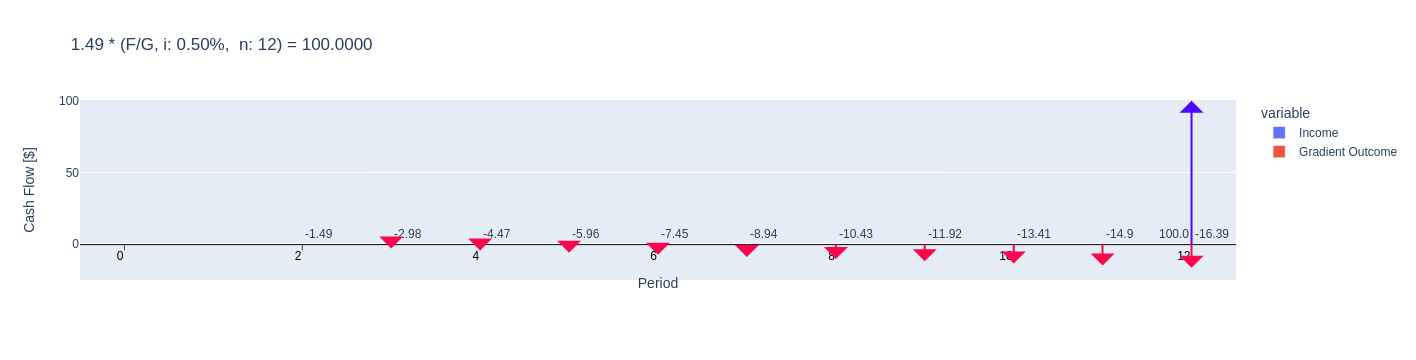

In [108]:
tvp.cf_plot_arrow(FG)

In [109]:
tvt.cfdataframe(FG)

Period  Gradient Outcome  Income
0        0              0.00     0.0
1        1             -0.00     0.0
2        2             -1.49     0.0
3        3             -2.98     0.0
4        4             -4.47     0.0
5        5             -5.96     0.0
6        6             -7.45     0.0
7        7             -8.94     0.0
8        8            -10.43     0.0
9        9            -11.92     0.0
10      10            -13.41     0.0
11      11            -14.90     0.0
12      12            -16.39   100.0

## 2.4 Geometric Gradient

### 2.4.1 Present Value given an initial Annuity and a Geometric Gradient

Factor "P/g" 

### When $g \neq i$


**Factor formula:**
$$
\begin{align*}
\large
P/g = \frac { 1 - \left( \frac {1+g}{1+i} \right)^n }  {i-g}
\end{align*}
$$



**Notation:**
$$
\large
P/g = (P/g, i, n)
$$

In [138]:
i = 0.005
g = 0.010
n = 6

gm = (1-(((1+g)/(1+i))**n))/(i-g)
gm

6.044899257468872

In [139]:
i = 0.005
g = 0.010
n = 6

gf = fc.pgivenga1(i,n,g)
gf

6.044899257468872

In [140]:
# Sanity check

assert gm == gf

Note here there is a new argument to be introduced, it is the geometric rate, this value is a percentage of the growth rate and must be an implicit value to be introduced in the formula.

**Equation with Factor Formula:**

$$
\begin{align*}
\large
P = g \left[ \frac { 1 - \left( \frac {1+g}{1+i} \right)^n }  {i-g} \right]
\end{align*}
$$

**Standard Notation Equation:**
$$
\large
P = g (P/g, i, n)
$$

In [141]:
A1m = 81.4829734944038

Pm = A1m * gm
Pm

492.55636597267727

In [142]:
A1f = 81.4829734944038

Pf = A1f * gf
Pf

492.55636597267727

In [145]:
Factor = "P/g"
A1 = 81.4829734944038
g = 0.010
i = 0.005
n = 6

Pg = tv.cfv(A1, Factor, i, n, g)
Pg

{'A1': 81.4829734944038,
 'Factor': 'P/g',
 'i': 0.005,
 'n': 6,
 'g': 0.01,
 'PV': 492.55636597267727}

In [146]:
assert Pm == Pg['PV']

   Period  Gradient Income   Outcome
0       0           0.0000 -492.5564
1       1          81.4830    0.0000
2       2          82.2978    0.0000
3       3          83.1208    0.0000
4       4          83.9520    0.0000
5       5          84.7915    0.0000
6       6          85.6395    0.0000


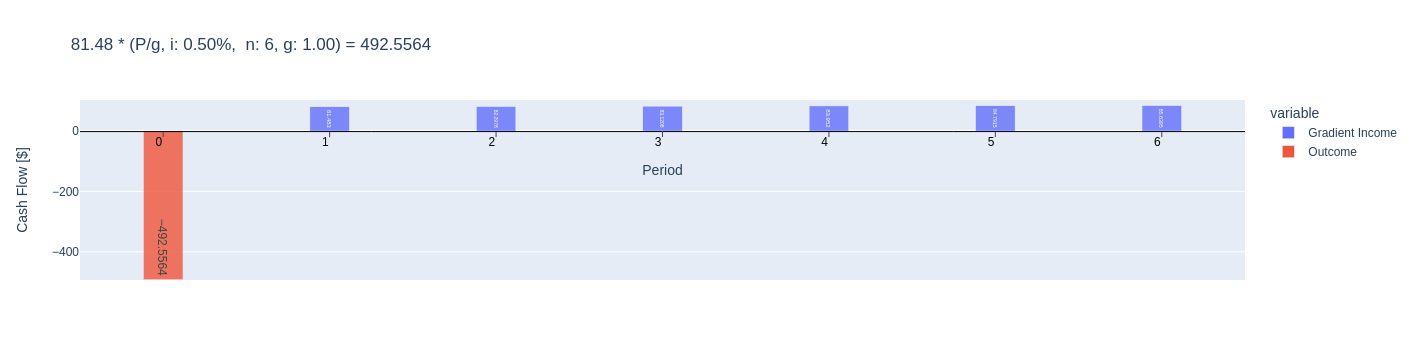

In [147]:
tvp.cf_plot_bar(Pg)

   Period  Gradient Income   Outcome
0       0           0.0000 -492.5564
1       1          81.4830    0.0000
2       2          82.2978    0.0000
3       3          83.1208    0.0000
4       4          83.9520    0.0000
5       5          84.7915    0.0000
6       6          85.6395    0.0000


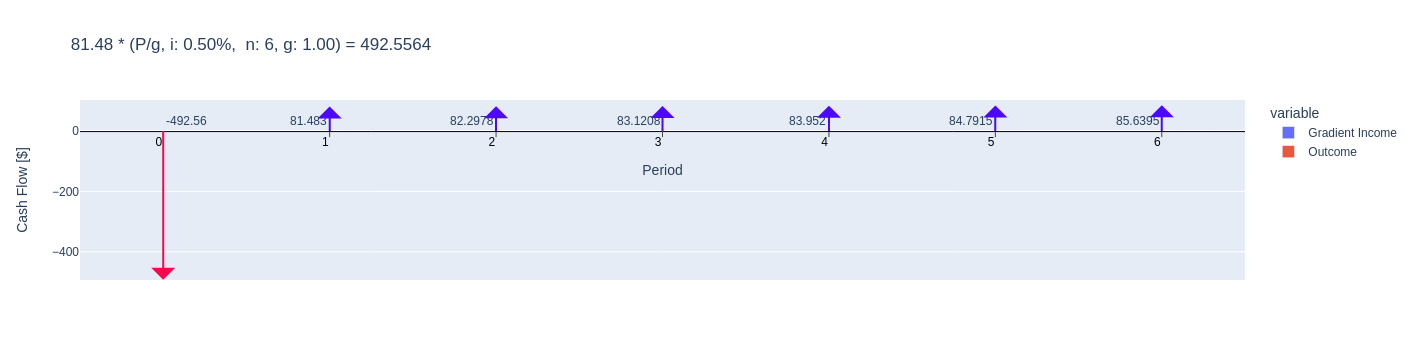

In [148]:
tvp.cf_plot_arrow(Pg)

In [149]:
tvt.cfdataframe(Pg)

Period  Gradient Income   Outcome
0       0         0.000000 -492.5564
1       1        81.483000    0.0000
2       2        82.297830    0.0000
3       3        83.120808    0.0000
4       4        83.952016    0.0000
5       5        84.791537    0.0000
6       6        85.639452    0.0000

# References

- Blank, Leland T., Tarquin, Anthony J.; Engineering economy; Eighth edition; New York; McGraw-Hill Education; 2017.

- Chan S. Park.; Fundamentals of engineering economics; Fourth edition; Pearson Education, Inc.; 2019.

